In [1]:
import pandas as pd

** Import data from HTML url - https://en.wikipedia.org/wiki/Wikipedia:Fundraising_statistics

In [3]:
url = 'https://en.wikipedia.org/wiki/Wikipedia:Fundraising_statistics'

In [8]:
data = pd.read_html(url)

In [13]:
type(data[0])

pandas.core.frame.DataFrame

In [14]:
fund = data[0]

In [15]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          18 non-null     object
 1   Source        18 non-null     object
 2   Revenue       18 non-null     object
 3   Expenses      18 non-null     object
 4   Asset rise    18 non-null     object
 5   Total assets  18 non-null     object
dtypes: object(6)
memory usage: 992.0+ bytes


In [19]:
fund.head()

,Year,Source,Revenue,Expenses,Asset rise,Total assets
0,2020/2021,PDF,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536"
1,2019/2020,PDF,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725"
2,2018/2019,PDF,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425"
3,2017/2018,PDF,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570"
4,2016/2017,PDF,"$ 91,242,418","$ 69,136,758","$ 21,547,402","$ 113,330,197"


In [20]:
fund.dtypes

Year            object
Source          object
Revenue         object
Expenses        object
Asset rise      object
Total assets    object
dtype: object

In [17]:
fund['Expenses']

0     $ 111,839,819
1     $ 112,489,397
2      $ 91,414,010
3      $ 81,442,265
4      $ 69,136,758
5      $ 65,947,465
6      $ 52,596,782
7      $ 45,900,745
8      $ 35,704,796
9      $ 29,260,652
10     $ 17,889,794
11     $ 10,266,793
12      $ 5,617,236
13      $ 3,540,724
14      $ 2,077,843
15        $ 791,907
16        $ 177,670
17         $ 23,463
Name: Expenses, dtype: object

In [23]:
fund['Exp'] = fund['Expenses'].str[2:].str.replace(',','')

In [27]:
fund['Exp'] = pd.to_numeric(fund['Exp'])

In [28]:
fund.dtypes

Year            object
Source          object
Revenue         object
Expenses        object
Asset rise      object
Total assets    object
Exp              int64
dtype: object

In [34]:
fund['Rev'] = fund['Revenue'].str[2:].str.replace(',','')
fund.loc[0,'Rev'] = 'scam'
fund['Rev'].head()

0         scam
1    129234327
2    120067266
3    104505783
4     91242418
Name: Rev, dtype: object

In [36]:
fund['Rev'] = pd.to_numeric(fund['Rev'],errors='coerce')

In [37]:
fund.head()

,Year,Source,Revenue,Expenses,Asset rise,Total assets,Exp,Rev
0,2020/2021,PDF,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536",111839819,NaN
1,2019/2020,PDF,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725",112489397,129234327.0
2,2018/2019,PDF,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425",91414010,120067266.0
3,2017/2018,PDF,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570",81442265,104505783.0
4,2016/2017,PDF,"$ 91,242,418","$ 69,136,758","$ 21,547,402","$ 113,330,197",69136758,91242418.0


In [38]:
fund.dtypes

Year             object
Source           object
Revenue          object
Expenses         object
Asset rise       object
Total assets     object
Exp               int64
Rev             float64
dtype: object

In [40]:
fund.any()

Year            True
Source          True
Revenue         True
Expenses        True
Asset rise      True
Total assets    True
Exp             True
Rev             True
dtype: bool

In [42]:
del fund['Source']

In [43]:
fund.head()

,Year,Revenue,Expenses,Asset rise,Total assets,Exp,Rev
0,2020/2021,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536",111839819,NaN
1,2019/2020,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725",112489397,129234327.0
2,2018/2019,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425",91414010,120067266.0
3,2017/2018,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570",81442265,104505783.0
4,2016/2017,"$ 91,242,418","$ 69,136,758","$ 21,547,402","$ 113,330,197",69136758,91242418.0


In [45]:
fund['Year'].head()

0    2020/2021
1    2019/2020
2    2018/2019
3    2017/2018
4    2016/2017
Name: Year, dtype: object

In [49]:
fund['Year'].apply(lambda x: x[5:]).head()

0    2021
1    2020
2    2019
3    2018
4    2017
Name: Year, dtype: object

In [50]:
fund['Year'] = fund['Year'].apply(lambda x: x[-4:])
fund['Year'] = pd.to_numeric(fund['Year'])

In [51]:
fund.head()

,Year,Revenue,Expenses,Asset rise,Total assets,Exp,Rev
0,2021,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536",111839819,NaN
1,2020,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725",112489397,129234327.0
2,2019,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425",91414010,120067266.0
3,2018,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570",81442265,104505783.0
4,2017,"$ 91,242,418","$ 69,136,758","$ 21,547,402","$ 113,330,197",69136758,91242418.0


In [53]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          18 non-null     int64  
 1   Revenue       18 non-null     object 
 2   Expenses      18 non-null     object 
 3   Asset rise    18 non-null     object 
 4   Total assets  18 non-null     object 
 5   Exp           18 non-null     int64  
 6   Rev           17 non-null     float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.1+ KB


In [57]:
fund.set_index('Year',inplace=True)

,Revenue,Expenses,Asset rise,Total assets,Exp,Rev
Year,,,,,,
2021,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536",111839819,NaN
2020,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725",112489397,129234327.0
2019,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425",91414010,120067266.0
2018,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570",81442265,104505783.0
2017,"$ 91,242,418","$ 69,136,758","$ 21,547,402","$ 113,330,197",69136758,91242418.0


In [59]:
fund.sort_index(inplace=True)
fund.head()

,Revenue,Expenses,Asset rise,Total assets,Exp,Rev
Year,,,,,,
2004,"$ 80,129","$ 23,463","$ 56,666","$ 56,666",23463,80129.0
2005,"$ 379,088","$ 177,670","$ 211,418","$ 268,084",177670,379088.0
2006,"$ 1,508,039","$ 791,907","$ 736,132","$ 1,004,216",791907,1508039.0
2007,"$ 2,734,909","$ 2,077,843","$ 654,066","$ 1,658,282",2077843,2734909.0
2008,"$ 5,032,981","$ 3,540,724","$ 3,519,886","$ 5,178,168",3540724,5032981.0


In [60]:
fund['Asset'] = fund['Asset rise'].str[2:].str.replace(',','')

In [61]:
fund['Asset'] = pd.to_numeric(fund['Asset'])

In [63]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 2004 to 2021
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Revenue       18 non-null     object 
 1   Expenses      18 non-null     object 
 2   Asset rise    18 non-null     object 
 3   Total assets  18 non-null     object 
 4   Exp           18 non-null     int64  
 5   Rev           17 non-null     float64
 6   Asset         18 non-null     int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 1.1+ KB


In [64]:
fund['Total'] = fund['Total assets'].str[2:].str.replace(',','')
fund['Total'] = pd.to_numeric(fund['Total'])

In [65]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 2004 to 2021
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Revenue       18 non-null     object 
 1   Expenses      18 non-null     object 
 2   Asset rise    18 non-null     object 
 3   Total assets  18 non-null     object 
 4   Exp           18 non-null     int64  
 5   Rev           17 non-null     float64
 6   Asset         18 non-null     int64  
 7   Total         18 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 1.3+ KB


In [66]:
fund.head()

,Revenue,Expenses,Asset rise,Total assets,Exp,Rev,Asset,Total
Year,,,,,,,,
2004,"$ 80,129","$ 23,463","$ 56,666","$ 56,666",23463,80129.0,56666,56666
2005,"$ 379,088","$ 177,670","$ 211,418","$ 268,084",177670,379088.0,211418,268084
2006,"$ 1,508,039","$ 791,907","$ 736,132","$ 1,004,216",791907,1508039.0,736132,1004216
2007,"$ 2,734,909","$ 2,077,843","$ 654,066","$ 1,658,282",2077843,2734909.0,654066,1658282
2008,"$ 5,032,981","$ 3,540,724","$ 3,519,886","$ 5,178,168",3540724,5032981.0,3519886,5178168


### Visualize data to investigate quality

In [68]:
import seaborn as sns

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Year'>

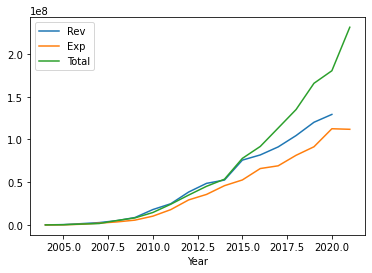

In [71]:
fund[['Rev','Exp','Total']].plot()

In [74]:
fund['Revenue'] = fund['Rev']
fund['Expenses'] = fund['Exp']
fund['Asset rise'] = fund['Asset']
fund['Total assets'] = fund['Total']

In [75]:
fund.head()

,Revenue,Expenses,Asset rise,Total assets,Exp,Rev,Asset,Total
Year,,,,,,,,
2004,80129.0,23463,56666,56666,23463,80129.0,56666,56666
2005,379088.0,177670,211418,268084,177670,379088.0,211418,268084
2006,1508039.0,791907,736132,1004216,791907,1508039.0,736132,1004216
2007,2734909.0,2077843,654066,1658282,2077843,2734909.0,654066,1658282
2008,5032981.0,3540724,3519886,5178168,3540724,5032981.0,3519886,5178168


In [78]:
fund.drop(columns=['Rev','Exp','Asset','Total'],inplace=True)

In [79]:
fund.head()

,Revenue,Expenses,Asset rise,Total assets
Year,,,,
2004,80129.0,23463,56666,56666
2005,379088.0,177670,211418,268084
2006,1508039.0,791907,736132,1004216
2007,2734909.0,2077843,654066,1658282
2008,5032981.0,3540724,3519886,5178168


<AxesSubplot:xlabel='Year'>

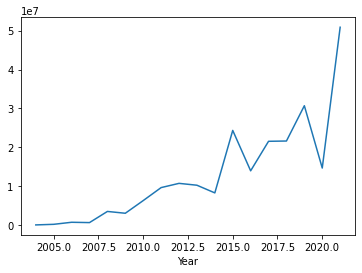

In [81]:
fund['Asset rise'].plot()

<AxesSubplot:xlabel='Year', ylabel='Expenses'>

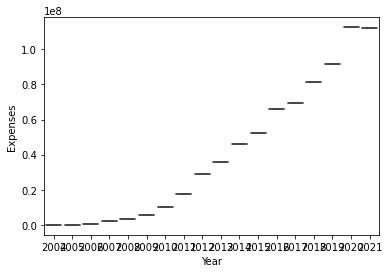

In [107]:
sns.boxplot(
    x=fund.index,
    y='Expenses',
    data=fund)

<AxesSubplot:xlabel='Year', ylabel='Total assets'>

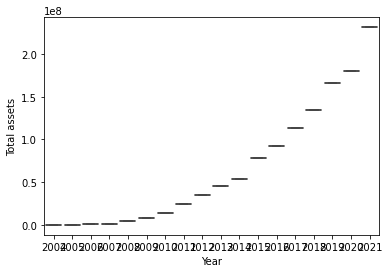

In [108]:
sns.boxplot(x=fund.index, y='Total assets', data=fund)